In [25]:
from google.colab import drive
import pandas as pd

In [26]:
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Machine Learning/Hands-On/Clustering/bank_transactions_data_2.csv'  # Ganti dengan path file Anda
data = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
print(data.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [20]:

data = data.dropna()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))


In [21]:
from sklearn.cluster import KMeans

# Tentukan jumlah cluster
k = 3

# Inisialisasi dan fitting model
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Tambahkan hasil cluster ke dataset
data['Cluster'] = clusters

# Tampilkan hasil
print(data.head())


  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

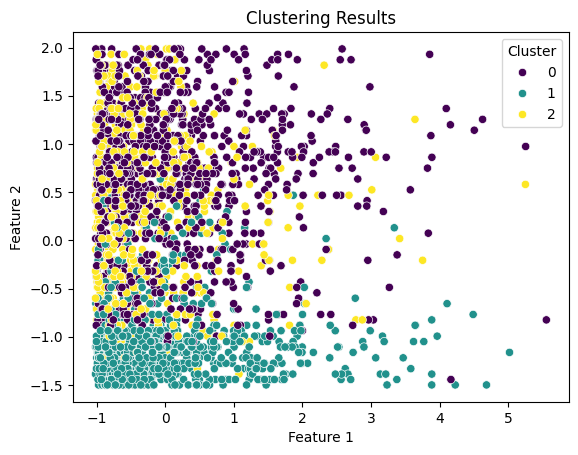

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi dengan scatter plot
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [27]:
output_path = '/content/drive/MyDrive/Machine Learning/Hands-On/Clustering/autoMPG.csv'
data.to_csv(output_path, index=False)
print(f"Hasil clustering disimpan di: {output_path}")


Hasil clustering disimpan di: /content/drive/MyDrive/Machine Learning/Hands-On/Clustering/autoMPG.csv
